# First ML Model using Titanic Dataset
**Suggestions are welcome**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8,5)})

In [41]:
titanic_train = pd.read_csv('../input/titanic/train.csv')
titanic_test = pd.read_csv('../input/titanic/test.csv')

# **Exploratory data analysis**

In [42]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic_train.shape

(891, 12)

In [44]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
titanic_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

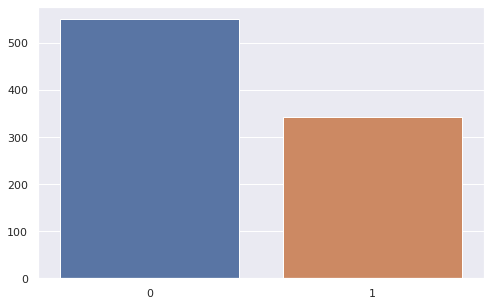

In [46]:
bp = sns.barplot(x=titanic_train.Survived.value_counts().keys(),y=list(titanic_train.Survived.value_counts()))
#bp.set(xlabel='Survived')

In [47]:
titanic_train.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1, inplace=True )

In [48]:
titanic_train

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [49]:
titanic_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [50]:
titanic_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [51]:
titanic_train.fillna(round(titanic_train.Age.mean()),inplace=True)

In [52]:
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [53]:
sex_dummies=pd.get_dummies(titanic_train.Sex,drop_first=True)
sex_dummies

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [54]:
titanic_train = pd.concat([titanic_train,sex_dummies],axis=1)
titanic_train

,Survived,Pclass,Sex,Age,Fare,male
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,30.0,23.4500,0
889,1,1,male,26.0,30.0000,1


In [55]:
titanic_train.drop(['Sex'],axis = 1,inplace=True)

In [56]:
titanic_train

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,30.0,23.4500,0
889,1,1,26.0,30.0000,1


In [57]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
feature_scale = ['Age','Fare']
titanic_train[feature_scale] = ss.fit_transform(titanic_train[feature_scale])

In [58]:
titanic_train.head()

,Survived,Pclass,Age,Fare,male
0,0,3,-0.597055,-0.502445,1
1,1,1,0.634162,0.786845,0
2,1,3,-0.289251,-0.488854,0
3,1,1,0.403309,0.420730,0
4,0,3,0.403309,-0.486337,1


In [59]:
X=titanic_train.drop(['Survived'],axis=1)
y=titanic_train['Survived']

In [60]:
X.head()

,Pclass,Age,Fare,male
0,3,-0.597055,-0.502445,1
1,1,0.634162,0.786845,0
2,3,-0.289251,-0.488854,0
3,1,0.403309,0.420730,0
4,3,0.403309,-0.486337,1


In [61]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Preparing Test Data**

In [62]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
titanic_test.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1,inplace=True )

In [64]:
titanic_test

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,NaN,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,NaN,8.0500


In [65]:
titanic_test.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [66]:
titanic_test.fillna(round(titanic_test.Age.mean()),inplace=True)
titanic_test.fillna(round(titanic_test.Fare.mean()),inplace=True)
titanic_test.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [67]:
sex_dummies=pd.get_dummies(titanic_test.Sex,drop_first=True)
titanic_test= pd.concat([titanic_test,sex_dummies],axis=1)
titanic_test.drop(['Sex'], axis=1, inplace=True )

In [68]:
titanic_test[feature_scale] = ss.fit_transform(titanic_test[feature_scale])

In [69]:
titanic_test.head()

,Pclass,Age,Fare,male
0,3,0.339424,-0.498160,1
1,3,1.329924,-0.513027,0
2,2,2.518523,-0.464841,1
3,3,-0.254876,-0.483219,1
4,3,-0.651076,-0.418225,0


# Model and Prediction

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [72]:
y_predicted = knn.predict(titanic_test)

In [73]:
y_predicted

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
passengerId = pd.read_csv('../input/titanic/test.csv',usecols=['PassengerId'])
passengerId.shape

(418, 1)

In [75]:
submission = pd.DataFrame({
        "PassengerId": passengerId['PassengerId'],
        "Survived": y_predicted
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
submission.to_csv('titanic_submission.csv', index=False)